# 의약품처방정보
* https://www.data.go.kr/dataset/15007117/fileData.do
* 의약품처방정보는 2002년부터 2013년까지의 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터이다.
* 약품일반성분명코드 : http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000
* <img src="https://i.imgur.com/hsrpJp4.png">

In [1]:
%ls -al data/NHIS_OPEN_T60_2016

total 6175232
drwx------@  4 corazzon  staff         128 Jun 17  2018 ./
drwxr-xr-x  16 corazzon  staff         512 Sep  2 15:43 ../
-rwxr-xr-x@  1 corazzon  staff  1634186487 Jan 22  2018 NHIS_OPEN_T60_2016_PART1.csv*
-rwxr-xr-x@  1 corazzon  staff  1521752479 Jan 22  2018 NHIS_OPEN_T60_2016_PART2.csv*


## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

In [4]:
nhis = pd.read_csv('data/NHIS_OPEN_T60_2016/NHIS_OPEN_T60_2016_PART1.csv', 
                   encoding='euc-kr')
nhis.shape

(20000000, 15)

In [5]:
nhis.head(3)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,데이터공개일자
0,2016,1,258969,1,2,11,28,20160219,100901ATB,1.0,2,3,188.0,1128,20171218
1,2016,1,258969,2,2,11,28,20160219,152301ATB,1.0,2,3,115.0,690,20171218
2,2016,1,258969,3,2,11,28,20160219,222901ATB,1.0,2,3,63.0,378,20171218


In [6]:
# 중복을 제거한 처방 갯수를 알아본다.
nhis["처방내역일련번호"].nunique()

4983648

In [7]:
# 중복을 제거한 처방 갯수를 알아본다.
nhis["가입자일련번호"].nunique()

503691

In [8]:
nhis.columns

Index(['기준년도', '가입자일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드',
       '요양개시일자', '약품일반성분명코드', '1회 투약량', '1일 투약량', '총투여일수', '단가', '금액',
       '데이터공개일자'],
      dtype='object')

In [9]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 15 columns):
기준년도           int64
가입자일련번호        int64
처방내역일련번호       int64
일련번호           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
요양개시일자         int64
약품일반성분명코드      object
1회 투약량         float64
1일 투약량         int64
총투여일수          int64
단가             float64
금액             int64
데이터공개일자        int64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.2+ GB


In [10]:
# 결측치 보기 
nhis.isnull().sum()

기준년도              0
가입자일련번호           0
처방내역일련번호          0
일련번호              0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
요양개시일자            0
약품일반성분명코드      1661
1회 투약량            0
1일 투약량            0
총투여일수             0
단가                0
금액                0
데이터공개일자           0
dtype: int64

In [11]:
nhis = nhis.drop(["기준년도", "데이터공개일자"], axis=1)

In [12]:
nhis["요양개시일자"] = pd.to_datetime(nhis["요양개시일자"], format='%Y%m%d')

In [13]:
nhis["요양개시월"] = nhis["요양개시일자"].dt.month

In [14]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 14 columns):
가입자일련번호        int64
처방내역일련번호       int64
일련번호           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
요양개시일자         datetime64[ns]
약품일반성분명코드      object
1회 투약량         float64
1일 투약량         int64
총투여일수          int64
단가             float64
금액             int64
요양개시월          int64
dtypes: datetime64[ns](1), float64(2), int64(10), object(1)
memory usage: 2.1+ GB


In [15]:
pd.options.display.float_format = '{:,.0f}'.format
nhis[["1회 투약량", "1일 투약량", "총투여일수", "단가", "금액"]].describe()

,1회 투약량,1일 투약량,총투여일수,단가,금액
count,"20,000,000","20,000,000","20,000,000","20,000,000","20,000,000"
mean,2,2,11,397,"5,651"
std,8,1,19,"2,228","83,428"
min,0,0,0,0,0
25%,1,2,3,53,564
50%,1,3,3,116,"1,266"
75%,1,3,7,261,"3,654"
max,"20,120",80,840,"357,142","270,000,000"


In [16]:
nhis.head()

,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,요양개시월
0,1,258969,1,2,11,28,2016-02-19,100901ATB,1,2,3,188,1128,2
1,1,258969,2,2,11,28,2016-02-19,152301ATB,1,2,3,115,690,2
2,1,258969,3,2,11,28,2016-02-19,222901ATB,1,2,3,63,378,2
3,1,18744123,3,2,11,28,2016-12-20,421001ATB,1,3,5,103,1545,12
4,1,18744123,2,2,11,28,2016-12-20,101804ACH,1,3,5,81,1215,12


In [17]:
nhis.tail()

,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,요양개시월
19999995,503691,47807845,3,1,10,41,2016-07-12,152501ATB,1,2,2,457,1828,7
19999996,503691,47807845,1,1,10,41,2016-07-12,222805ATB,1,3,2,112,672,7
19999997,503691,493075,1,1,10,41,2016-10-01,271800ATB,1,2,5,255,2550,10
19999998,503691,493075,3,1,10,41,2016-10-01,193302ATB,1,2,5,98,980,10
19999999,503691,493075,4,1,10,41,2016-10-01,521601ATB,1,2,5,248,2480,10


In [18]:
total_dose_day = nhis['총투여일수'].value_counts()
print(np.max(total_dose_day))
print(np.min(total_dose_day))
print(np.mean(total_dose_day))
print(np.median(total_dose_day))

7316870
1
76045.62737642585
236.0


In [19]:
nhis['성별코드'].value_counts()

2    11266113
1     8733887
Name: 성별코드, dtype: int64

In [20]:
nhis.groupby('성별코드')["금액"].mean()

성별코드
1   6,211
2   5,217
Name: 금액, dtype: float64

In [21]:
nhis.groupby('시도코드')["금액"].mean()

시도코드
11   6,001
26   5,961
27   5,413
28   5,615
29   5,313
30   5,208
31   4,577
36   4,365
41   5,254
42   6,767
43   5,272
44   5,809
45   5,975
46   6,254
47   5,957
48   5,588
49   5,821
Name: 금액, dtype: float64

In [22]:
nhis['연령대코드(5세단위)'] = nhis['연령대코드(5세단위)'].astype(int)

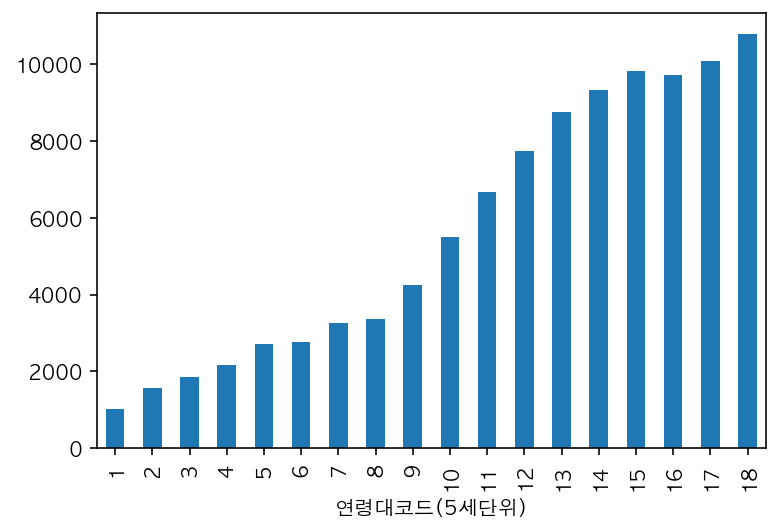

In [23]:
# 연령대코드가 올라갈수록 평균 금액이 높아진다.
nhis.groupby('연령대코드(5세단위)')["금액"].mean().plot.bar()

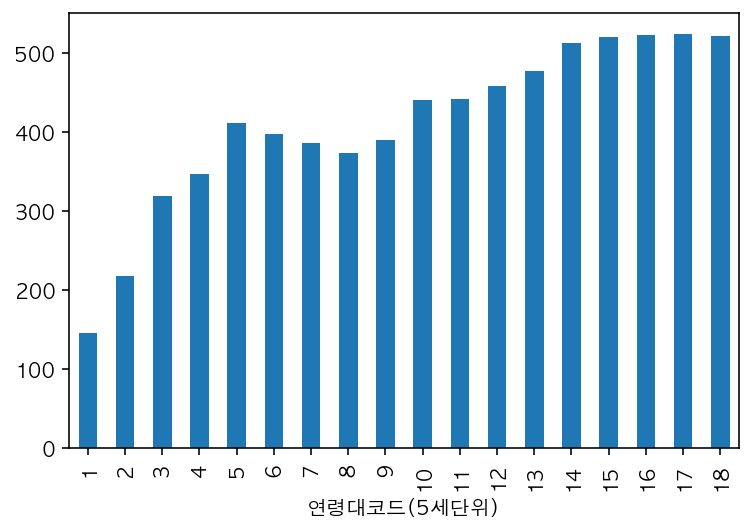

In [24]:
nhis.groupby('연령대코드(5세단위)')["단가"].mean().plot.bar()

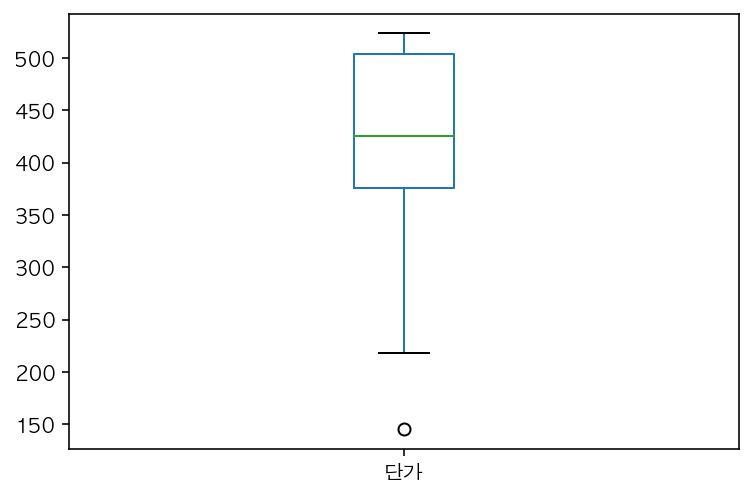

In [25]:
nhis.groupby('연령대코드(5세단위)')["단가"].mean().plot.box()

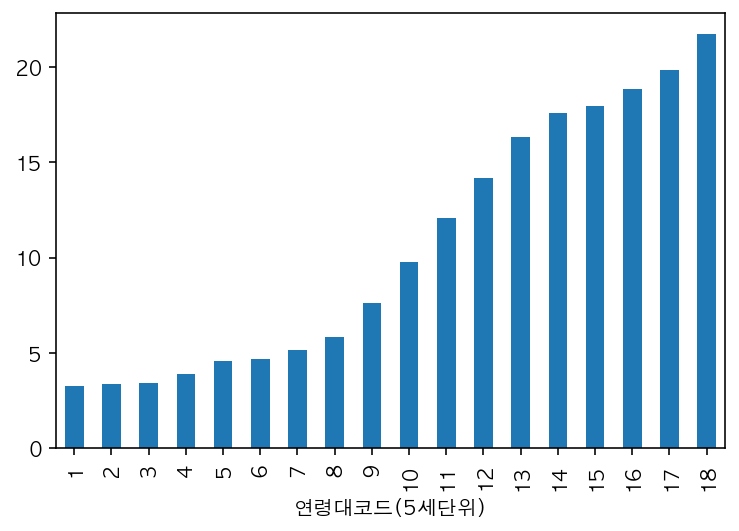

In [26]:
# 연령대가 높을 수록 평균 총투여일수도 늘어난다.
nhis.groupby('연령대코드(5세단위)')["총투여일수"].mean().plot.bar()

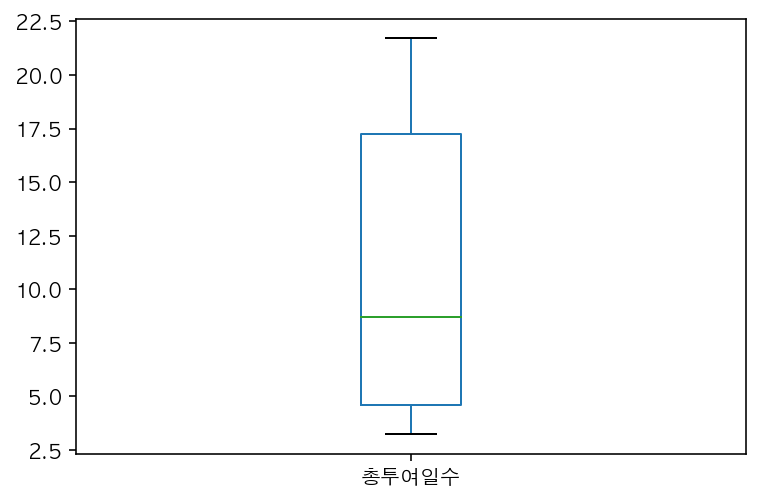

In [27]:
nhis.groupby('연령대코드(5세단위)')["총투여일수"].mean().plot.box()

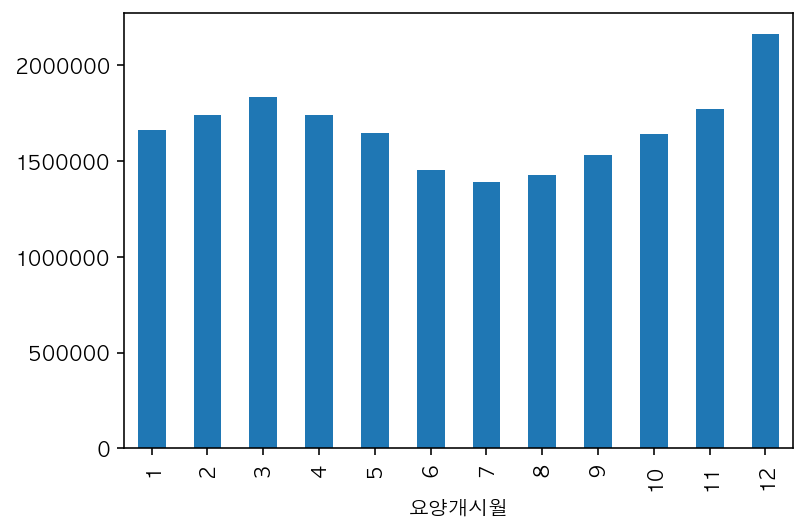

In [28]:
nhis.groupby('요양개시월')["금액"].count().plot.bar()

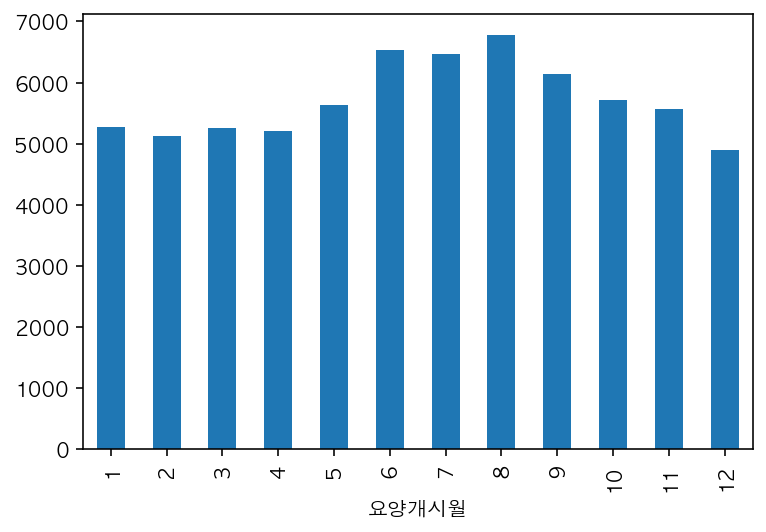

In [29]:
nhis.groupby('요양개시월')["금액"].mean().plot.bar()

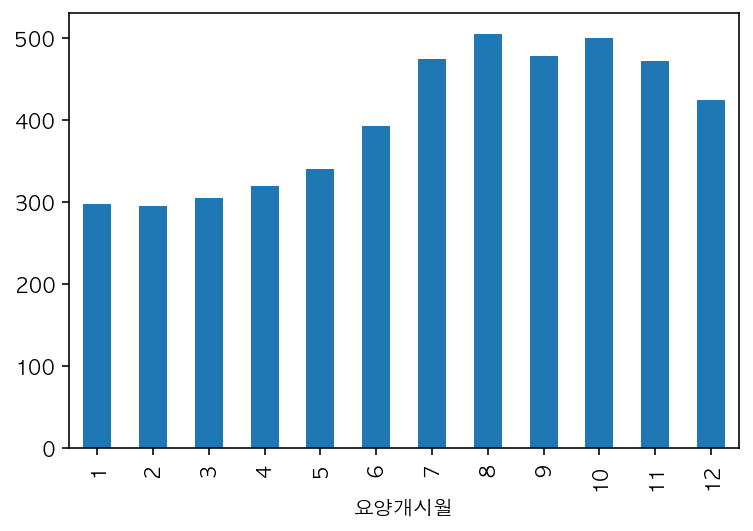

In [30]:
nhis.groupby('요양개시월')["단가"].mean().plot.bar()

In [31]:
nhis["총투여일수"].describe()

count   20,000,000
mean            11
std             19
min              0
25%              3
50%              3
75%              7
max            840
Name: 총투여일수, dtype: float64

In [32]:
# 총 투여일수가 1년 이상인 데이터
nhis[nhis["총투여일수"] > 200].shape

(2586, 14)

In [33]:
nhis_dose_day = nhis[nhis["총투여일수"] > 200]

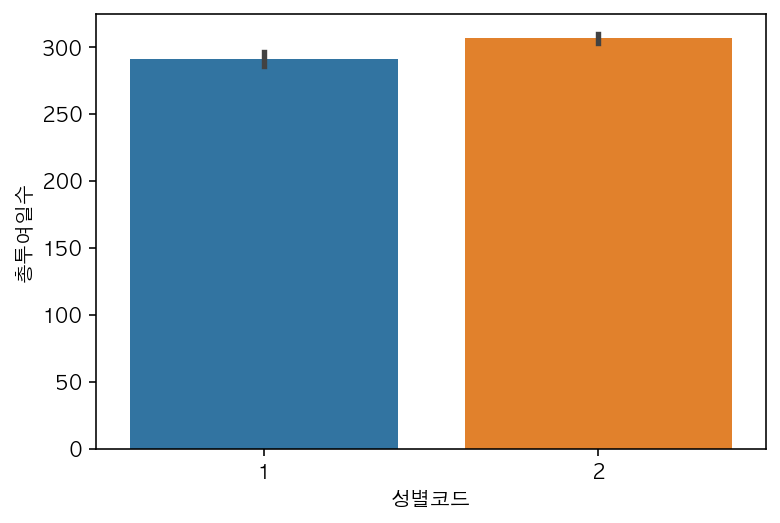

In [34]:
sns.barplot(data=nhis_dose_day, x="성별코드", y="총투여일수")

In [35]:
# 총투여일수가 200일 이상인 데이터를 추출
nhis_dose_day['약품일반성분명코드'].value_counts().head()

183601ATB    572
183608ATB    358
183604ATB    111
473800ATB    108
498200ATB     64
Name: 약품일반성분명코드, dtype: int64

In [36]:
# 총투여일수가 200일 넘는 약 중 가장 많은 데이터가 있는 183601ATB 를 검색해 보면
# 갑상선호르몬제
nhis_183601ATB = nhis[nhis["약품일반성분명코드"] == "183601ATB"]

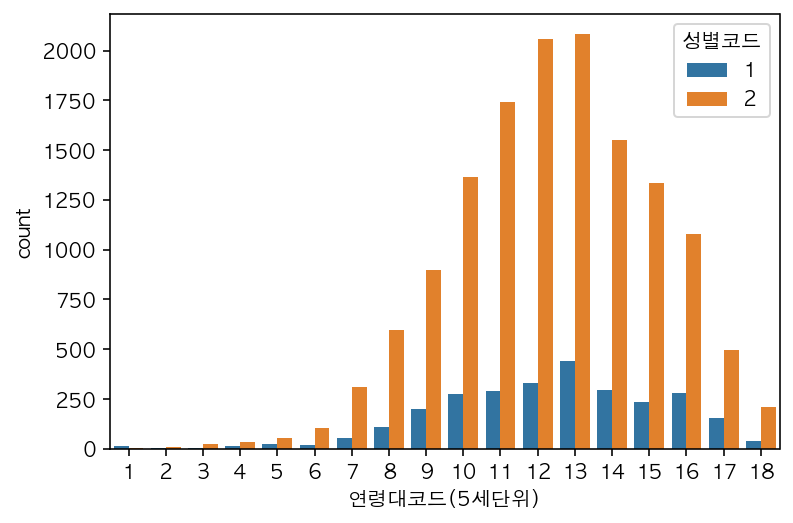

In [37]:
sns.countplot(data=nhis_183601ATB, x="연령대코드(5세단위)", hue="성별코드")

In [38]:
# 총투여일수가 200일 넘는 약 중 2위인 183608ATB 를 검색해 보면
# 갑상선호르몬제
nhis_183608ATB = nhis[nhis["약품일반성분명코드"] == "183608ATB"]

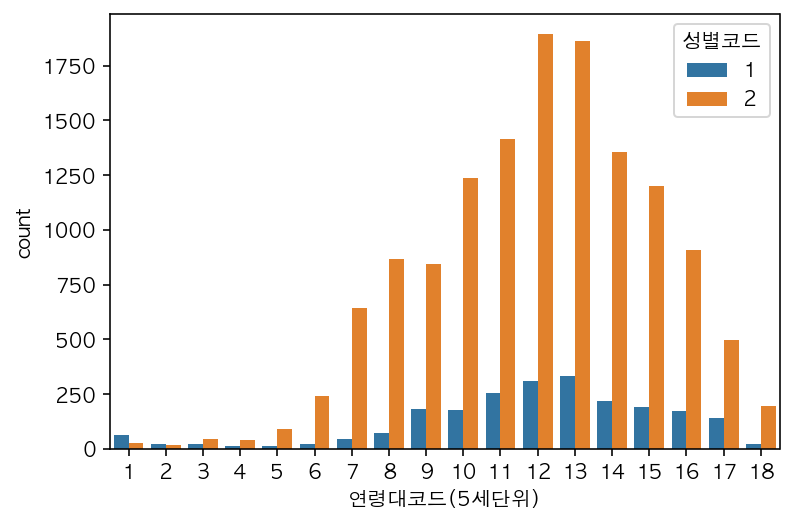

In [39]:
sns.countplot(data=nhis_183608ATB, x="연령대코드(5세단위)", hue="성별코드")

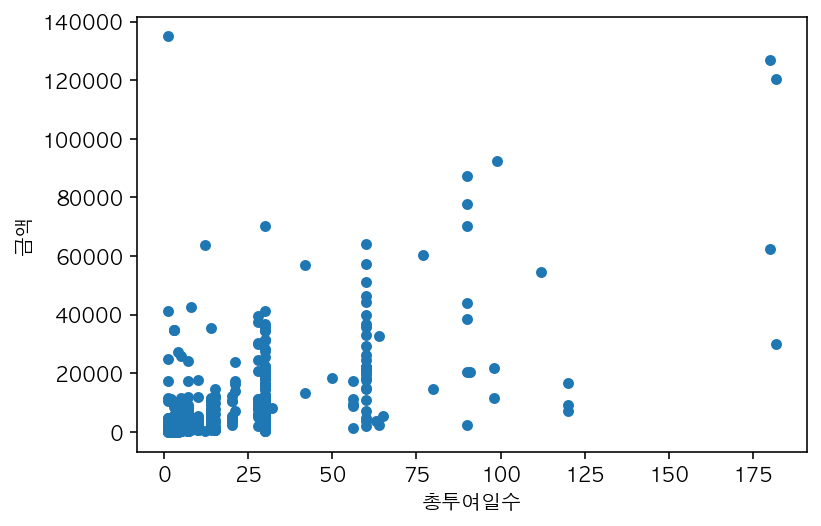

In [40]:
# 데이터양이 많아 샘플 1000개에 대해서만 시각화
nhis[["총투여일수", "금액"]].sample(1000).plot.scatter(x="총투여일수", y="금액")

In [41]:
# 총투여일수가 100일 미만이고 금액이 5만원 미만인 데이터
nhis_day_100 = nhis[(nhis["총투여일수"] < 100) & (nhis["금액"] < 50000)]
nhis_day_100.shape

(19626311, 14)

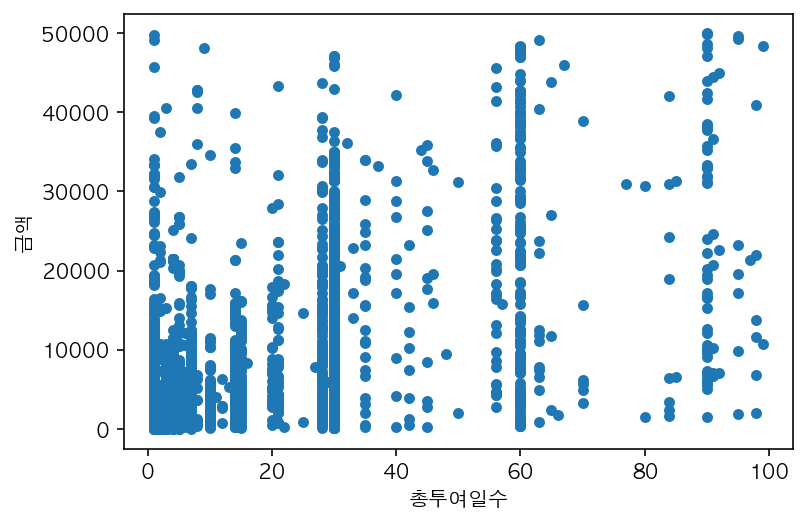

In [42]:
# 총투여일수 100일 미안의 scatterplot을 그린다. 
# 데이터가 많아 임의로 10000개를 샘플링해서 그림
nhis_day_100[["총투여일수", "금액"]].sample(10000).plot.scatter(x="총투여일수", y="금액")

In [43]:
# 1회 투약량이 300인 데이터
nhis[nhis["1회 투약량"] > 300].shape

(405, 14)

In [44]:
# 1회투약량이 100개 이하인 데이터만 가져오기
nhis_100 = nhis[nhis["1회 투약량"] < 100]
nhis_100.shape

(19981855, 14)

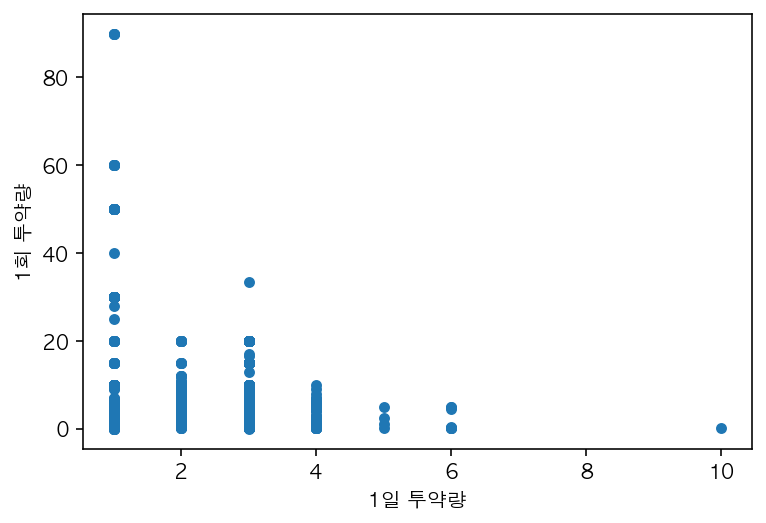

In [45]:
nhis_100[["1회 투약량", "1일 투약량"]].sample(10000).plot.scatter(
    x="1일 투약량", y="1회 투약량")

In [46]:
nhis.sample()

,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회 투약량,1일 투약량,총투여일수,단가,금액,요양개시월
11141323,280753,24845702,5,1,14,26,2016-11-10,111403ATB,1,1,30,88,2640,11


In [47]:
nhis_per_count = nhis.groupby(
    ["가입자일련번호", "처방내역일련번호", "요양개시일자", "연령대코드(5세단위)"])["일련번호"].count().reset_index()

In [48]:
nhis_per_count.columns = ["가입자일련번호", "처방내역일련번호", "요양개시일자", "연령대코드(5세단위)", "약품코드수"]

In [49]:
nhis_per_count.shape

(4983648, 5)

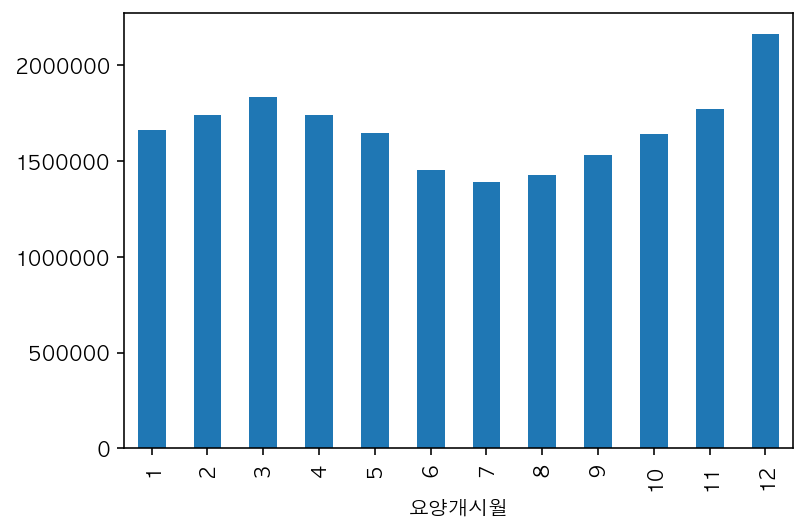

In [50]:
nhis.groupby(["요양개시월"])["요양개시일자"].count().plot.bar()

In [51]:
# 가장 많이 처방을 받은 상위 5개의 약품
nhis["약품일반성분명코드"].value_counts().head()

438901ATB    792412
220902ATB    499081
186101ATB    494091
101430ATR    441490
222901ATB    438177
Name: 약품일반성분명코드, dtype: int64

In [52]:
# 스트렙토키나제·스트렙토도르나제
# 효소제제(소염효소제)
nhis_438901ATB = nhis[nhis["약품일반성분명코드"] == "438901ATB"]

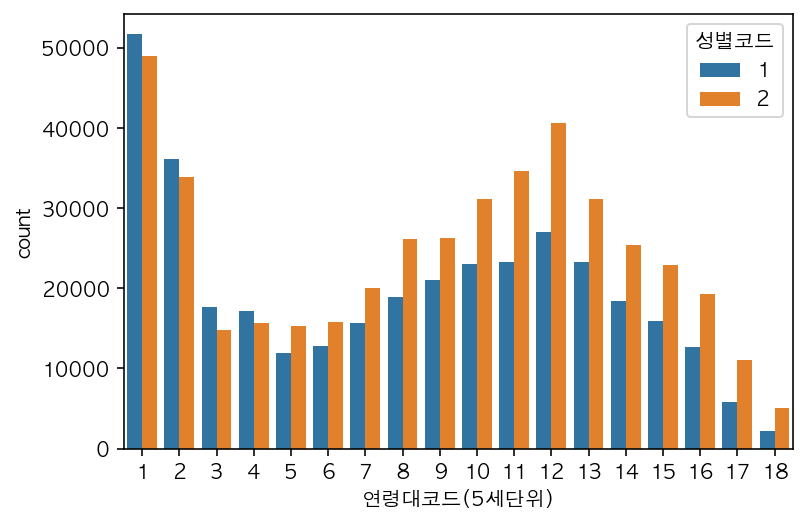

In [53]:
sns.countplot(data=nhis_438901ATB, x="연령대코드(5세단위)", hue="성별코드")

In [54]:
nhis_438901ATB.columns

Index(['가입자일련번호', '처방내역일련번호', '일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '요양개시일자',
       '약품일반성분명코드', '1회 투약량', '1일 투약량', '총투여일수', '단가', '금액', '요양개시월'],
      dtype='object')

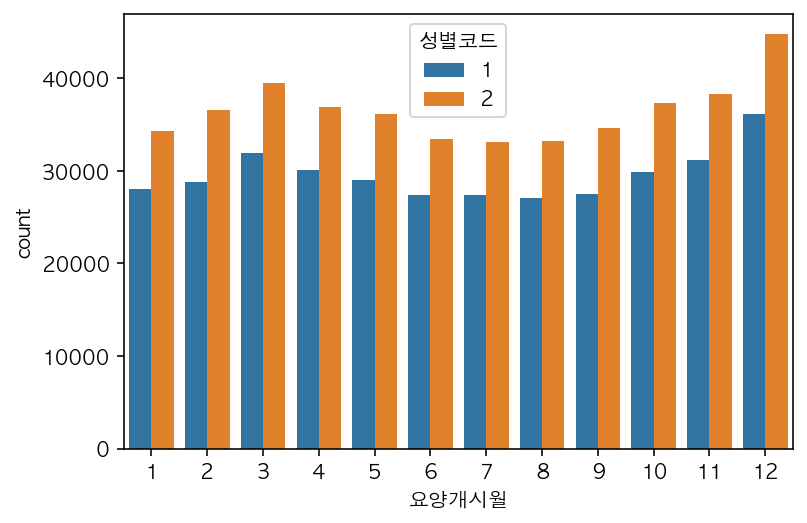

In [55]:
sns.countplot(data=nhis_438901ATB, x="요양개시월", hue="성별코드")

In [56]:
# 220902ATB  진해거담제
nhis_220902ATB = nhis[nhis["약품일반성분명코드"] == "220902ATB"]

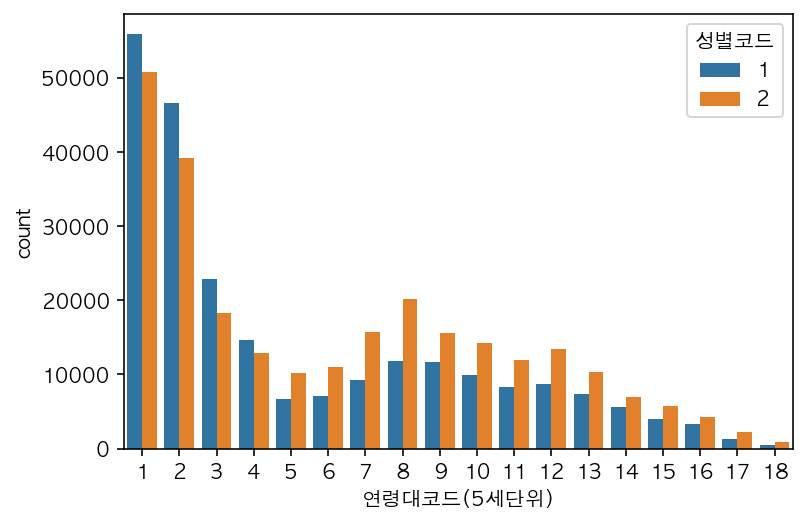

In [57]:
sns.countplot(data=nhis_220902ATB, x="연령대코드(5세단위)", hue="성별코드")

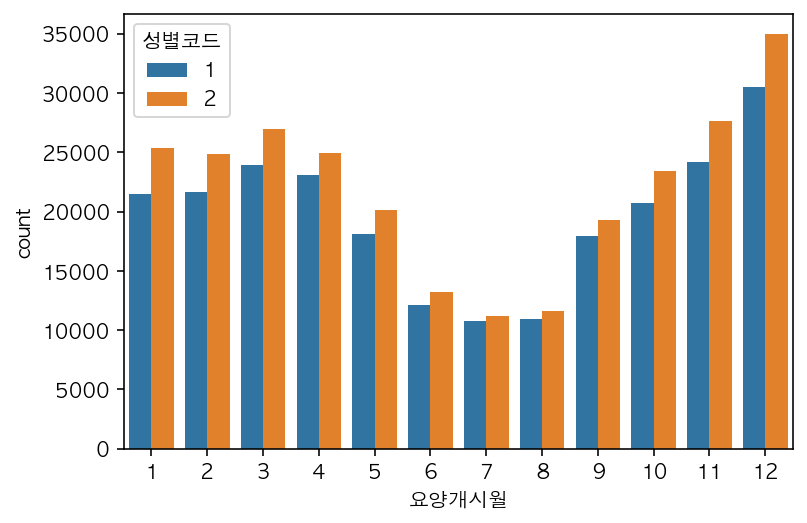

In [58]:
sns.countplot(data=nhis_220902ATB, x="요양개시월", hue="성별코드")

In [59]:
# 해열·진통·소염제 186101ATB
nhis_186101ATB = nhis[nhis["약품일반성분명코드"] == "186101ATB"]

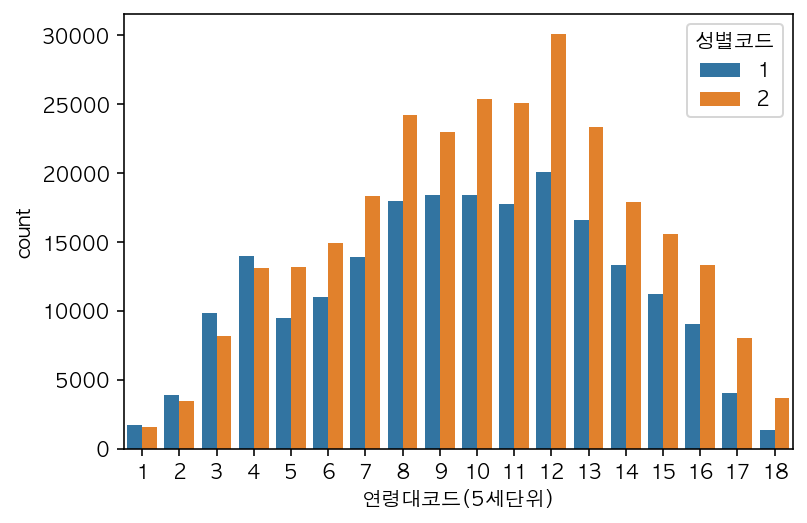

In [60]:
sns.countplot(data=nhis_186101ATB, x="연령대코드(5세단위)", hue="성별코드")

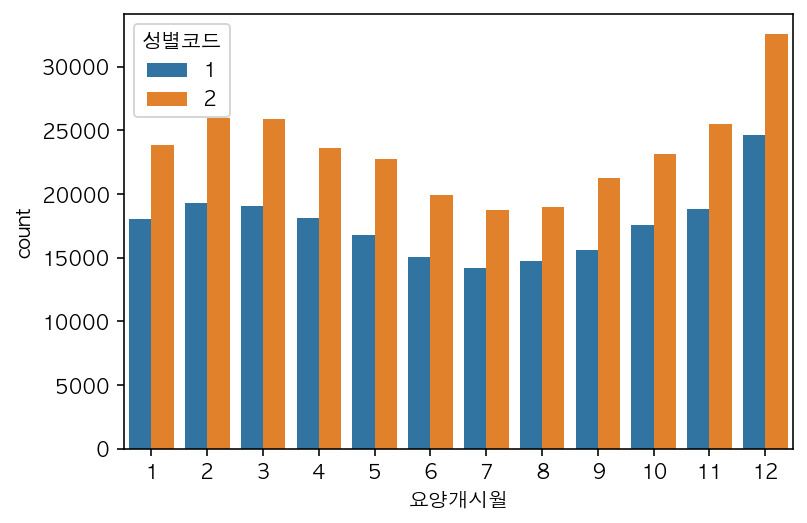

In [61]:
sns.countplot(data=nhis_186101ATB, x="요양개시월", hue="성별코드")

In [62]:
# 101430ATR 아세트아미노펜(타이레놀, 펜잘큐, 게보린, 판피린, 암씨롱의 주성분으로 해열 진통 작용)

In [63]:
# 222901ATB 궤양치료제
nhis_222901ATB = nhis[nhis["약품일반성분명코드"] == "222901ATB"]

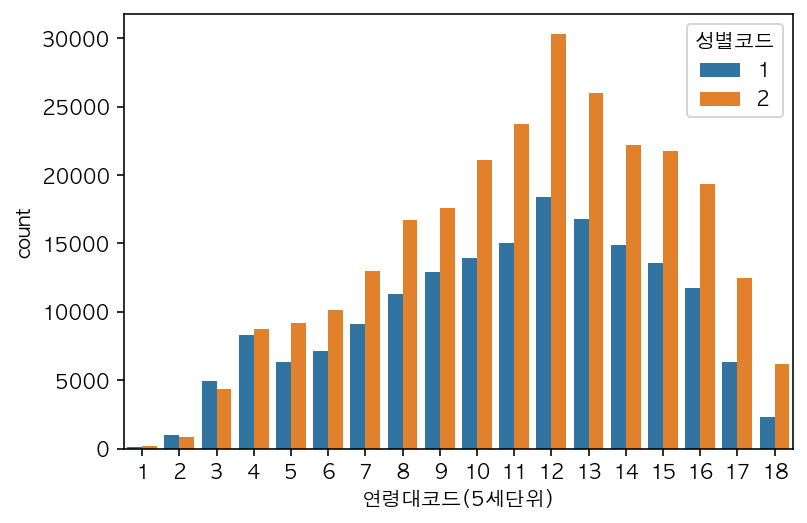

In [64]:
sns.countplot(data=nhis_222901ATB, x="연령대코드(5세단위)", hue="성별코드")

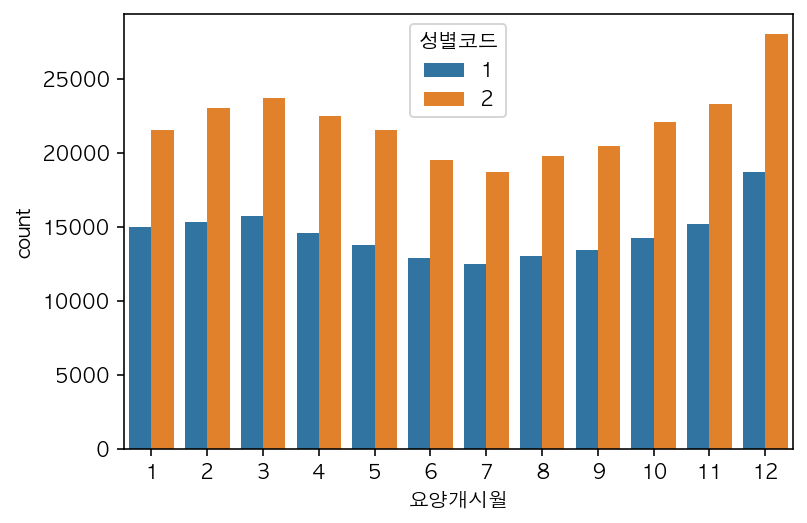

In [65]:
sns.countplot(data=nhis_222901ATB, x="요양개시월", hue="성별코드")

### 금액이 높은 약

In [66]:
nhis["금액"].describe()

count    20,000,000
mean          5,651
std          83,428
min               0
25%             564
50%           1,266
75%           3,654
max     270,000,000
Name: 금액, dtype: float64

In [67]:
# 금액이 100만원 이상인 데이터만 
nhis[nhis["금액"] > 1000000].shape

(1487, 14)

In [68]:
nhis_high_price =  nhis[nhis["금액"] > 1000000]

In [69]:
nhis_high_price["약품일반성분명코드"].value_counts().head()

412701ATB    185
644401ATB    166
638101ATB    141
453001ATB    136
488001ATB     75
Name: 약품일반성분명코드, dtype: int64

In [70]:
# 412701ATB : 이매티닙메실산염,  표적치료 항암제
nhis_412701ATB = nhis[nhis["약품일반성분명코드"] == "412701ATB"]
nhis_412701ATB.shape

(230, 14)

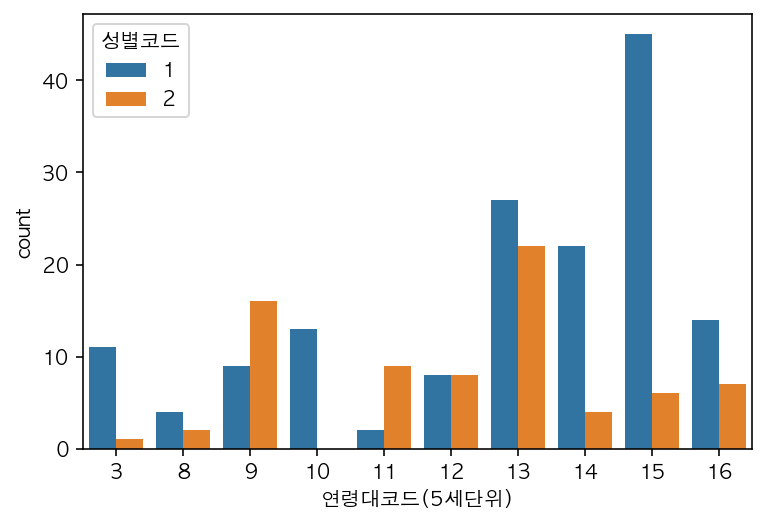

In [71]:
sns.countplot(data=nhis_412701ATB, x="연령대코드(5세단위)", hue="성별코드")

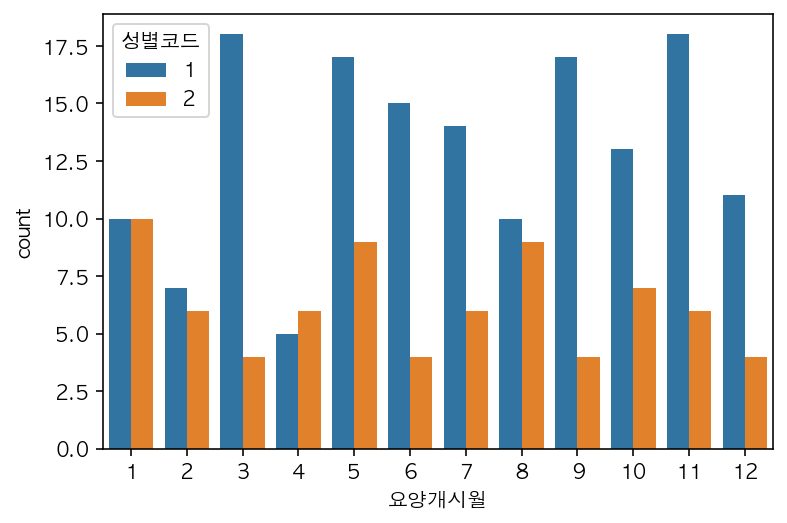

In [72]:
sns.countplot(data=nhis_412701ATB, x="요양개시월", hue="성별코드")

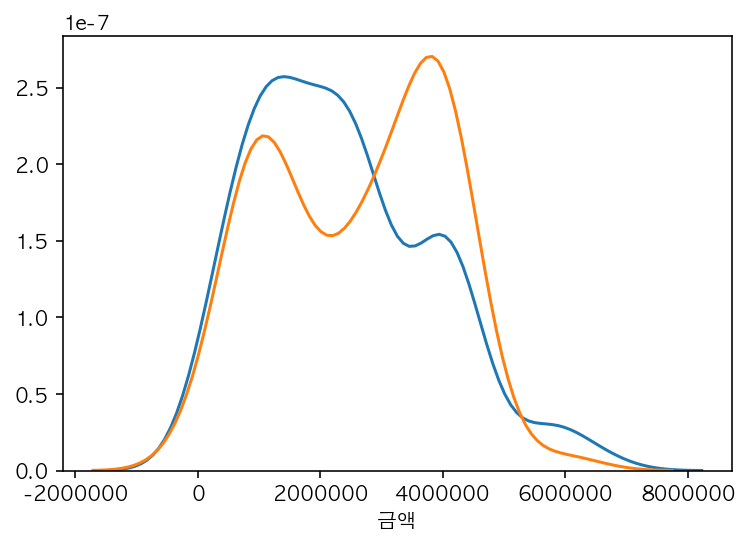

In [73]:
sns.distplot(nhis_412701ATB.loc[nhis_412701ATB["성별코드"] == 1, "금액"], hist=False)
sns.distplot(nhis_412701ATB.loc[nhis_412701ATB["성별코드"] == 2, "금액"], hist=False)

In [74]:
nhis["단가"].describe()

count   20,000,000
mean           397
std          2,228
min              0
25%             53
50%            116
75%            261
max        357,142
Name: 단가, dtype: float64